# Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load and Visualize the MNIST Dataset

11490434/11490434 [==============================] - 5s 0us/step


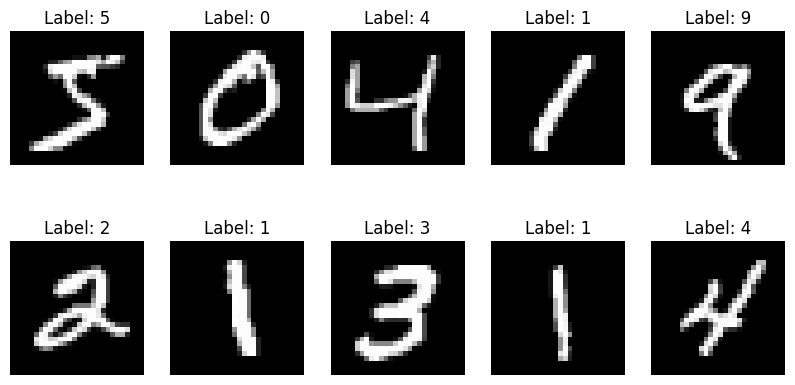

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

# Preprocess the Data

In [4]:
# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images (28x28 → 784 features)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to categorical (One-Hot Encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#  Build the Deep Feedforward Neural Network

In [5]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),  # First hidden layer
    keras.layers.Dense(128, activation='relu'),  # Second hidden layer
    keras.layers.Dense(64, activation='relu'),  # Third hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


# Train the Model and Visualize Training Progress

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2124 - accuracy: 0.9355 - val_loss: 0.1042 - val_accuracy: 0.9682
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9725 - val_loss: 0.0873 - val_accuracy: 0.9725
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.0926 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0903 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.1020 - val_accuracy: 0.9719
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.1056 - val_accuracy: 0.9734
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0937 - val_accuracy:

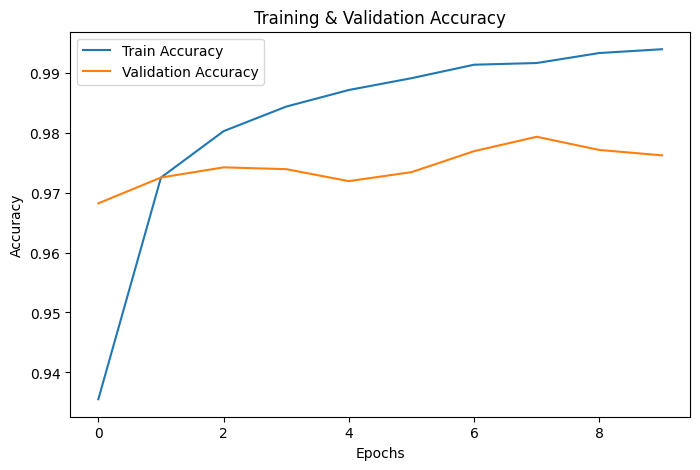

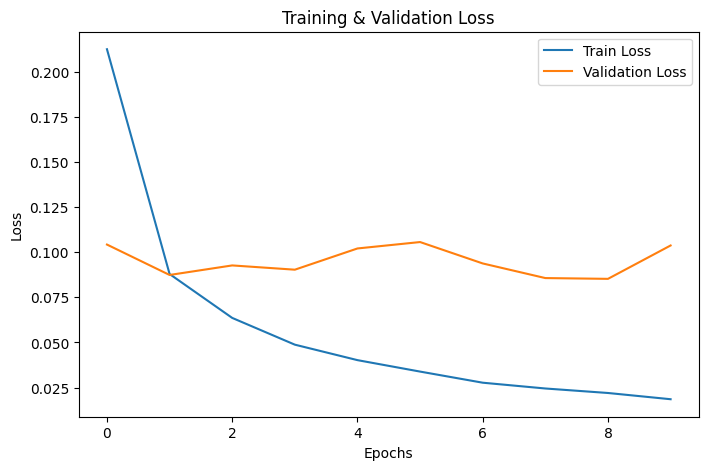

In [6]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, batch_size=32, verbose=1)

# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

# Evaluate the Model & Display Results

Test Accuracy: 0.9762
313/313 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



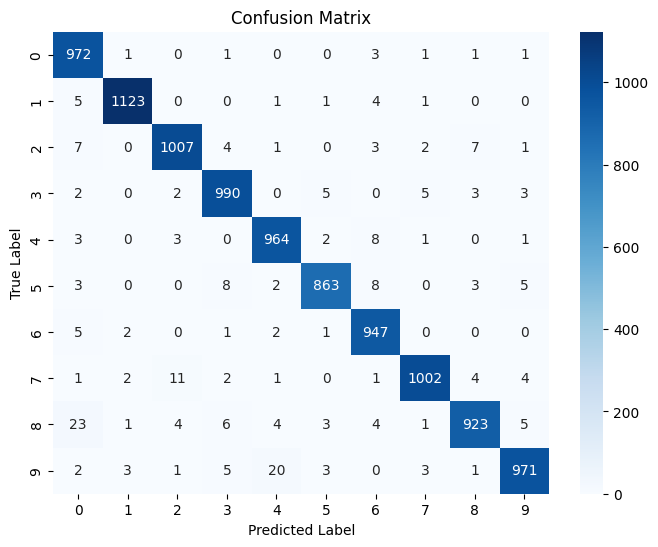

In [15]:
# Evaluate model performance on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict labels for test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Visualize Some Incorrect Predictions

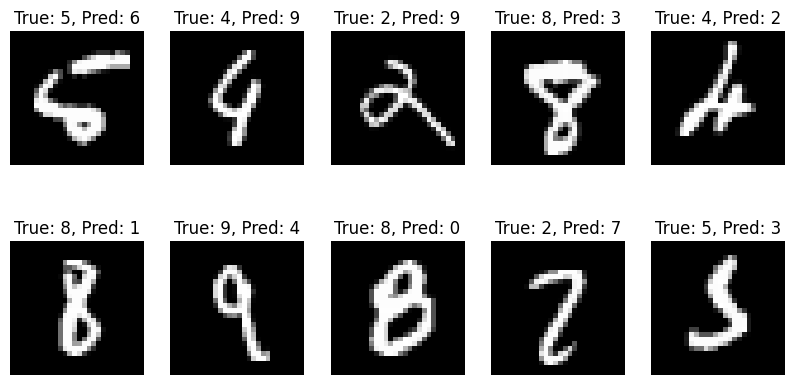

In [14]:
incorrect_indices = np.where(y_pred_classes != y_true)[0]
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    idx = incorrect_indices[i]
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    ax.axis('off')

plt.show()


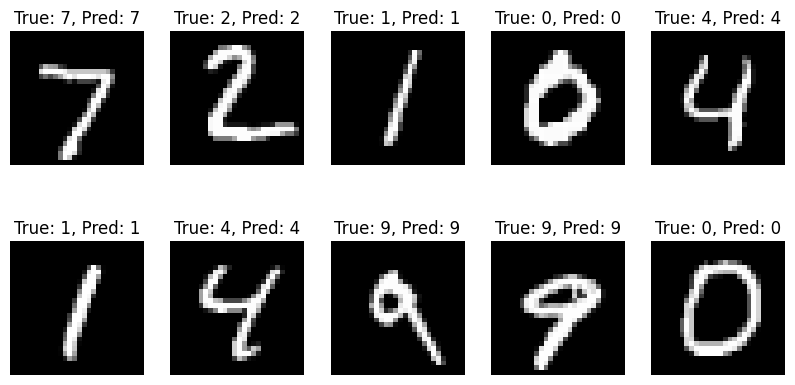

In [19]:
# Find indices of correct predictions
correct_indices = np.where(y_pred_classes == y_true)[0]

# Display some correctly predicted samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    idx = correct_indices[i]
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    ax.axis('off')

plt.show()

# Complexiciity

In [20]:
# Select indices of correct predictions
correct_indices = np.where(y_pred_classes == y_true)[0]

In [21]:
# Balanced sampling: Ensure representation from multiple classes
class_samples = []
for class_label in range(10):  # Loop over each class
    class_correct = correct_indices[y_true[correct_indices] == class_label]
    if len(class_correct) > 0:
        class_samples.append(np.random.choice(class_correct))

print("Selected correct predictions for visualization:", class_samples)

Selected correct predictions for visualization: [7202, 9241, 3775, 6177, 3096, 7108, 8869, 2513, 1198, 6784]


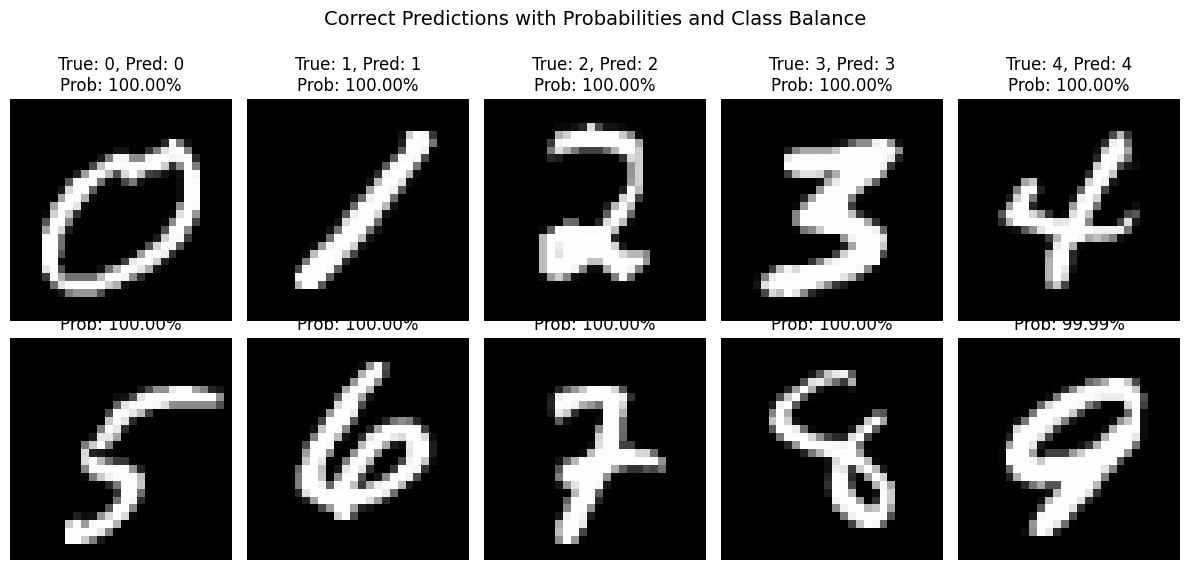

In [22]:
# Enhanced Visualization with prediction probability and titles
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
plt.suptitle("Correct Predictions with Probabilities and Class Balance", fontsize=14)

for i, ax in enumerate(axes.flat):
    if i < len(class_samples):
        idx = class_samples[i]
        image = x_test[idx].reshape(28, 28)
        true_label = y_true[idx]
        pred_label = y_pred_classes[idx]
        pred_prob = y_pred[idx][pred_label] * 100  # Prediction probability

        ax.imshow(image, cmap='gray')
        ax.set_title(f"True: {true_label}, Pred: {pred_label}\nProb: {pred_prob:.2f}%")
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# DROPOUT LAYER 

In [23]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

# Define a more complex model architecture
model = keras.Sequential([
    Dense(512, input_shape=(784,)),  # First dense layer with larger size
    BatchNormalization(),  # Batch normalization
    LeakyReLU(),  # LeakyReLU activation for better gradient flow
    Dropout(0.3),  # Dropout for regularization

    Dense(256),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.2),

    Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

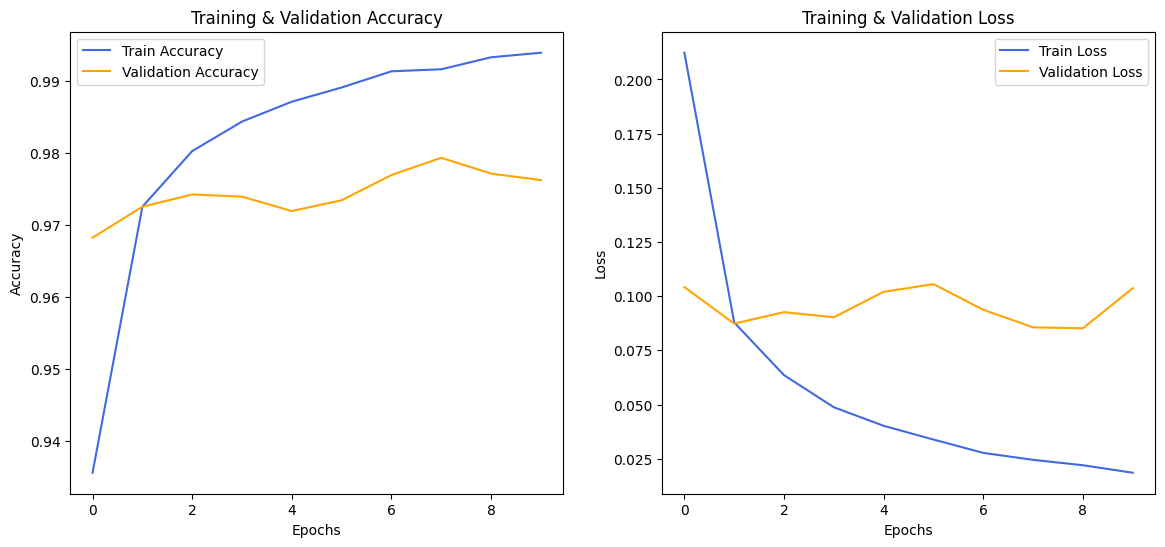

In [28]:
# Plot Training & Validation Accuracy and Loss Side by Side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='royalblue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax1.set_title("Training & Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss', color='royalblue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.set_title("Training & Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()

plt.show()

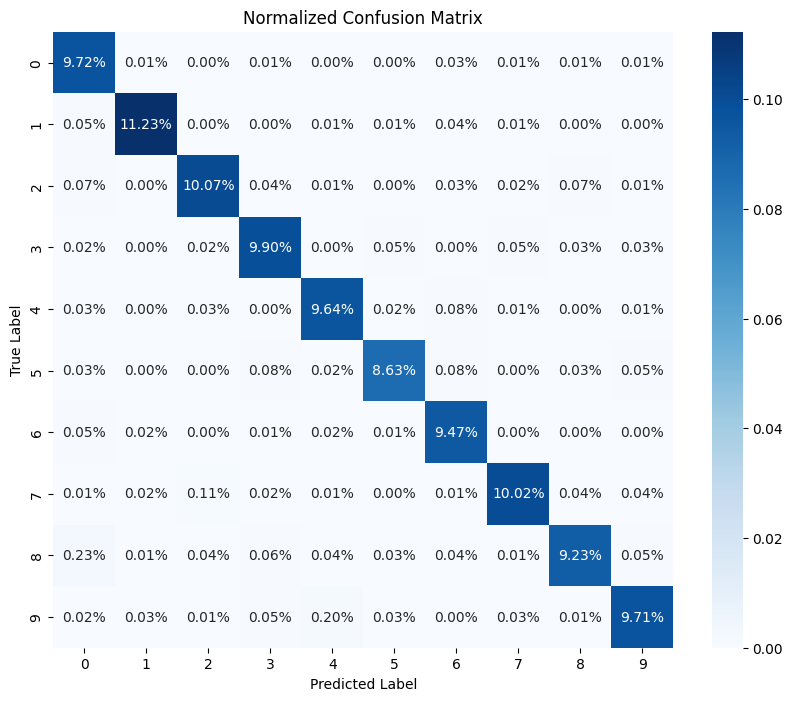

In [29]:
# Plot the Confusion Matrix with normalized percentages
plt.figure(figsize=(10, 8))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()

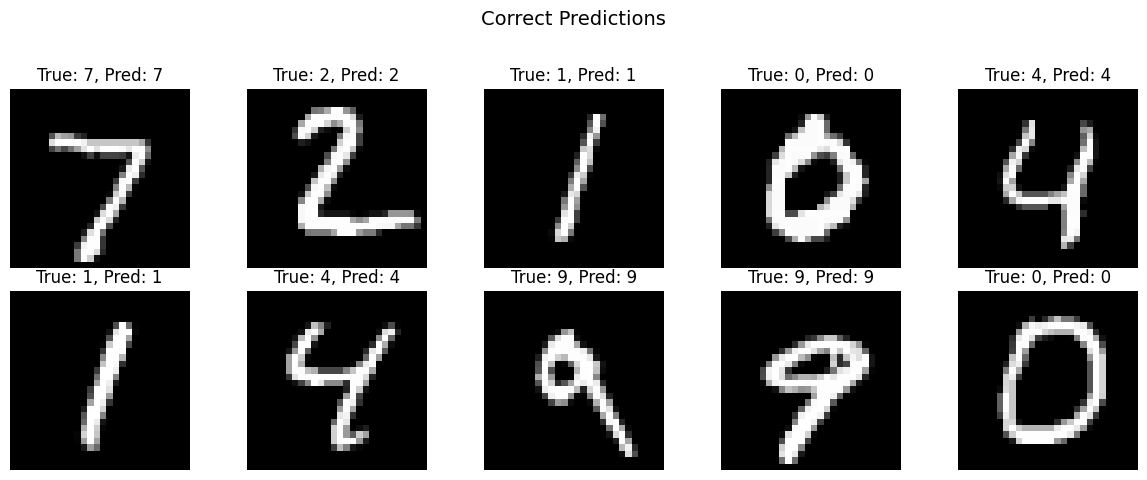

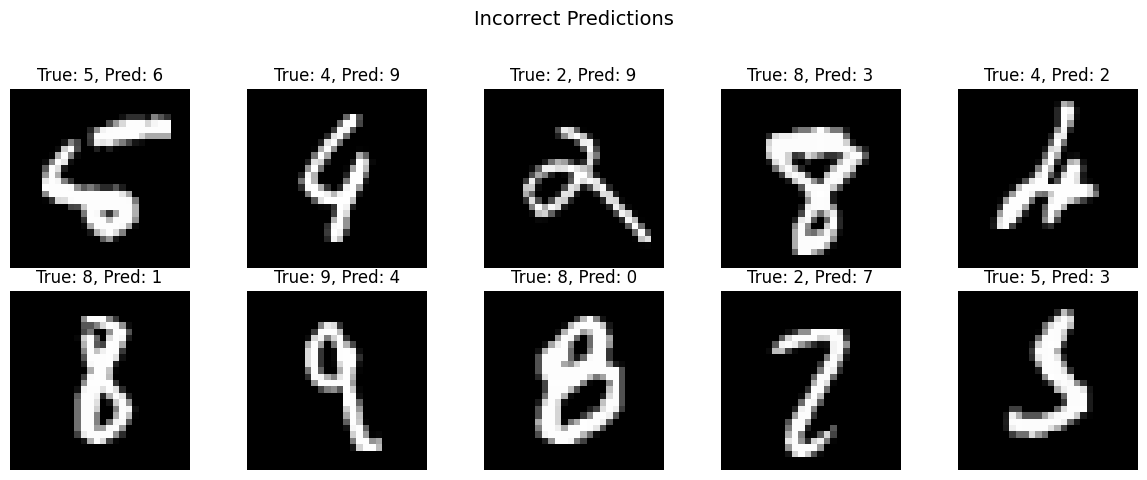

In [30]:
# Display correct predictions
correct_indices = np.where(y_pred_classes == y_true)[0]
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
plt.suptitle("Correct Predictions", fontsize=14)

for i, ax in enumerate(axes.flat):
    if i < len(correct_indices):
        idx = correct_indices[i]
        ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display incorrect predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
plt.suptitle("Incorrect Predictions", fontsize=14)

for i, ax in enumerate(axes.flat):
    if i < len(incorrect_indices):
        idx = incorrect_indices[i]
        ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()